## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


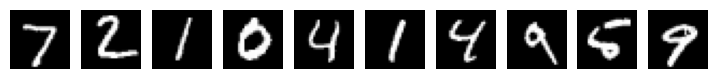

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder
#latent_vec_len=100 # this gives us better prediction
# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)

Epoch 1/10
469/469 [==============================] - 15s 30ms/step - loss: 0.2166 - val_loss: 0.1675
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1553 - val_loss: 0.1482
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1456 - val_loss: 0.1430
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1417 - val_loss: 0.1405
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1390 - val_loss: 0.1382
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1370 - val_loss: 0.1367
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1354 - val_loss: 0.1354
Epoch 8/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1338 - val_loss: 0.1339
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1325 - val_loss: 0.1335
Epoch 10/10
469/469 [==============================] - 15s 31ms/step - loss: 0.131

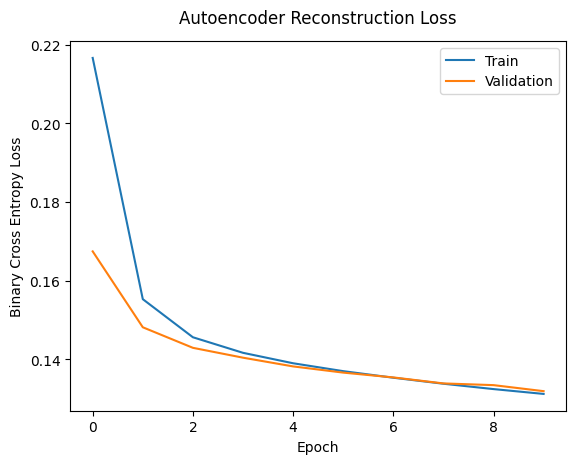

In [6]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 6ms/step


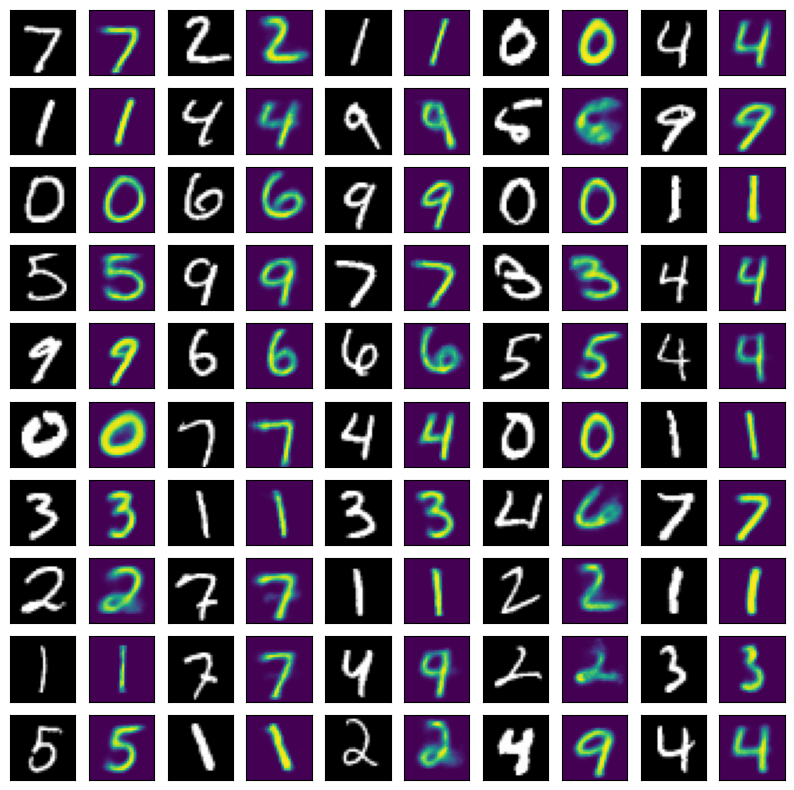

In [7]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [8]:
autoencoder.save('initially_trained_autoencoder.h5')

But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 27ms/step
(1, 784)


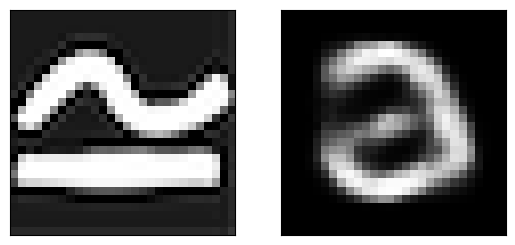

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary

Since the new image wasn't part of the original training dataset, it's seen as an 'anomoly' by the autoencoder. This is indicated by the difference (error) betweem the original image and the reconstructed image.

# Discussion & Results

the dimensionality of the hidden layers is reduced such that the network is forced to focus on the important part of the data. bottleneck layers are added to reduce the number of feature maps (aka channels) in the network, which, otherwise, tend to increase in each layer. The bottleneck in a neural network is just a layer with fewer neurons than the layer below or above it, we can observe the layer with 6 neurons in the middle.
When the bottle neck is initialized to 6, our Binary entropy loss higher ranging from 0.14 to above 0.21 compared to when we had increase the bottle neck to 100 where the loss was comparitively lower at ranging below 0.18.

The images showcased have somewhat less accurately predicted when our bottleneck neuron layer was set to 6.

In a sequential Keras autoencoder, increasing the bottleneck size from 6 neurons to 100 neurons can significantly improve autoencoder performance.

An autoencoder's bottleneck layer is the layer with the fewest neurons, and it is critical to the autoencoder's ability to compress and reconstruct data. A bottleneck layer with too few neurons leads to poor compression, whereas a bottleneck layer with too many neurons leads to overfitting.

**By increasing the bottleneck size from 6 to 100 neurons, the autoencoder's ability to capture more complex and diverse features in the input data improves compression and reconstruction performance.**

*If the bottleneck layer of a sequential Keras autoencoder has only 6 neurons, the autoencoder may have limited capacity to capture and represent complex features in the input data, which can result in poor compression and reconstruction performance.*

When we have changed to bottle neck to 100, we can see slight difference in the training & test data plot, Having such a layer encourages the network to compress feature representations, The goal here is usually finding a network that generalises well to new images, and bottleneck layers help by reducing the number of parameters in the network whilst still allowing it to be deep and represent many feature maps. Clearly a complex encoder can compress information into a narrow bottleneck such that it can be reconstructed with high accuracy

However, if the training data is limited, increasing the bottleneck size too much can increase the risk of overfitting.
It is important to note that changing the bottleneck size alone may not be sufficient to improve the overall performance of the autoencoder, as other factors such as encoder and decoder architecture, optimization algorithm, and loss function selection can all have a significant impact. Experiment with various architectures and hyperparameters to find the best configuration for a given dataset and task.

**The final new testing image which was not part of the training, is poorly predicted when the layer was set to 6, however increasing the bottle neck layer to 100, we got a better predicted image though it was full of noise, we can see that even though the model might overfit, but we could get slightly better predicted image which was not part of training data.**

**Below we can see the code when we have 100 bottleneck**

In [10]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


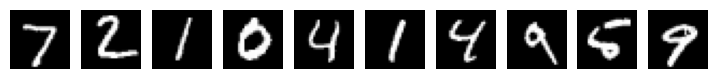

In [11]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [12]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
#latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder
latent_vec_len=100 # this gives us better prediction
# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)

Epoch 1/10
469/469 [==============================] - 16s 30ms/step - loss: 0.1788 - val_loss: 0.1233
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1133 - val_loss: 0.1041
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1009 - val_loss: 0.0960
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0943 - val_loss: 0.0917
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0903 - val_loss: 0.0886
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0874 - val_loss: 0.0860
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0854 - val_loss: 0.0835
Epoch 8/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0838 - val_loss: 0.0831
Epoch 9/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0826 - val_loss: 0.0828
Epoch 10/10
469/469 [==============================] - 15s 32ms/step - loss: 0.081

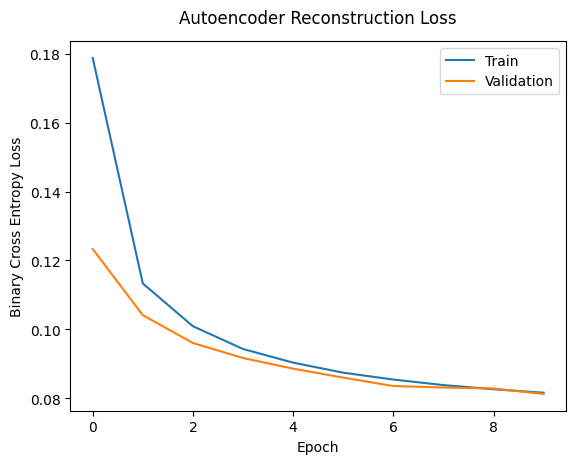

In [14]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 6ms/step


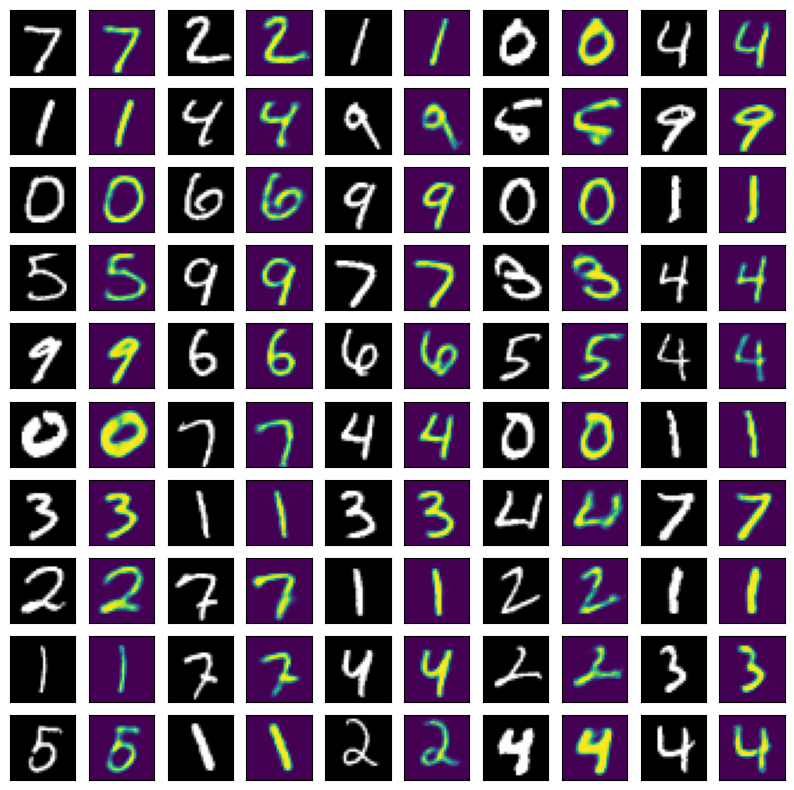

In [15]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [16]:
autoencoder.save('initially_trained_autoencoder.h5')

But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 27ms/step
(1, 784)


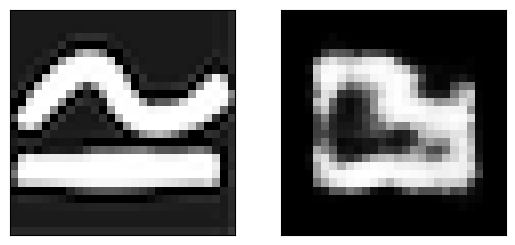

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()
